# Quarterback Game Logs

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/raw/Game_Logs_Quarterback.csv')

In [3]:
df.head()

,Player Id,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,...,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
0,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,1,08/11,Home,CHI,L,...,--,--,--,0.0,--,--,--,--,--,--
1,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,2,08/18,Away,ARI,W,...,0,0,0,46.9,--,--,--,--,--,--
2,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,3,08/25,Home,DAL,W,...,--,--,--,0.0,--,--,--,--,--,--
3,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,4,08/30,Away,TB,L,...,1,2,13,50.8,2,17,8.5,0,--,--
4,billdemory/2512778,"Demory, Bill",NaN,1974,Regular Season,1,09/15,Away,KC,L,...,--,--,--,0.0,--,--,--,--,--,--


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40247 entries, 0 to 40246
Data columns (total 29 columns):
Player Id                    40247 non-null object
Name                         40247 non-null object
Position                     10094 non-null object
Year                         40247 non-null int64
Season                       40247 non-null object
Week                         40247 non-null int64
Game Date                    40247 non-null object
Home or Away                 40247 non-null object
Opponent                     40247 non-null object
Outcome                      40247 non-null object
Score                        40247 non-null object
Games Played                 40247 non-null int64
Games Started                40247 non-null object
Passes Completed             40247 non-null object
Passes Attempted             40247 non-null object
Completion Percentage        40247 non-null object
Passing Yards                40247 non-null object
Passing Yards Per Attempt  

In [8]:
def norm_cols(cols):
    '''
    converts column naming to traditional database-stle naming convention
    '''
    
    cols = cols.str.replace(' ','_').str.replace('(','').str.replace(')','').str.lower()
    return cols

In [9]:
# apply column renaming to dataframe
df.columns = norm_cols(df.columns)
df.columns

Index(['player_id', 'name', 'position', 'year', 'season', 'week', 'game_date',
       'home_or_away', 'opponent', 'outcome', 'score', 'games_played',
       'games_started', 'passes_completed', 'passes_attempted',
       'completion_percentage', 'passing_yards', 'passing_yards_per_attempt',
       'td_passes', 'ints', 'sacks', 'sacked_yards_lost', 'passer_rating',
       'rushing_attempts', 'rushing_yards', 'yards_per_carry', 'rushing_tds',
       'fumbles', 'fumbles_lost'],
      dtype='object')

In [21]:
df['game_date'].head()

0    08/11
1    08/18
2    08/25
3    08/30
4    09/15
Name: game_date, dtype: object

In [23]:
#df['game_date'] = pd.to_datetime(df['game_date'])
df['month'],df['day'] = df['game_date'].str.split('/',1).str
df['game_datetime'] = pd.to_datetime(df[['year','month','day']],format='%Y%M%d')

In [36]:
df.replace({'--': 0},inplace=True)

In [38]:
df['passing_yards'] = df['passing_yards'].astype('float')

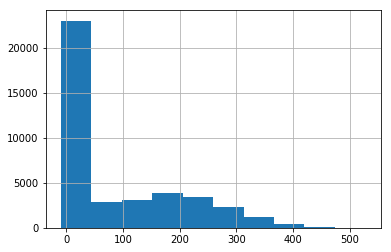

In [39]:
df['passing_yards'].hist()